In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import RepeatedStratifiedKFold
from sklearn.model_selection import cross_val_score
import pandas as pd
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
from sklearn import metrics
from sklearn.metrics import roc_auc_score
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
from sklearn.metrics import ConfusionMatrixDisplay

# Reading in data

In [4]:
D = pd.read_csv("meta-dataset.csv")
D.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 10 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  226 non-null    int64  
 1   beta_0      226 non-null    float64
 2   beta_1      226 non-null    float64
 3   beta_2      226 non-null    float64
 4   beta_3      226 non-null    float64
 5   beta_4      226 non-null    float64
 6   beta_5      226 non-null    float64
 7   beta_6      226 non-null    float64
 8   beta_7      226 non-null    float64
 9   label       226 non-null    int64  
dtypes: float64(8), int64(2)
memory usage: 17.8 KB


In [5]:
X = D.drop(columns=['label', 'Unnamed: 0'])
y = D['label']
X.info()
y.info()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 0)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 226 entries, 0 to 225
Data columns (total 8 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   beta_0  226 non-null    float64
 1   beta_1  226 non-null    float64
 2   beta_2  226 non-null    float64
 3   beta_3  226 non-null    float64
 4   beta_4  226 non-null    float64
 5   beta_5  226 non-null    float64
 6   beta_6  226 non-null    float64
 7   beta_7  226 non-null    float64
dtypes: float64(8)
memory usage: 14.3 KB
<class 'pandas.core.series.Series'>
RangeIndex: 226 entries, 0 to 225
Series name: label
Non-Null Count  Dtype
--------------  -----
226 non-null    int64
dtypes: int64(1)
memory usage: 1.9 KB


# Train data with kNN modle of different parameters

In [58]:
grid_params = { 'n_neighbors' : list(range(3, 70)),
               'weights' : ['uniform','distance'],
               'metric' : ['minkowski','euclidean','manhattan', 'haversine', 'cosine']}
gs = GridSearchCV(KNeighborsClassifier(), grid_params, scoring = 'f1_weighted', cv=5, n_jobs = -1)

In [59]:
g_res = gs.fit(X_train, y_train)

/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py:778: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/model_selection/_validation.py", line 767, in _score
    scores = scorer(estimator, X_test, y_test)
  File "/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 234, in __call__
    return self._score(
  File "/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 276, in _score
    y_pred = method_caller(estimator, "predict", X)
  File "/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_scorer.py", line 73, in _cached_call
    return getattr(estimator, method)(*args, **kwargs)
  File "/Users/zijin/opt/anaconda3/lib/python3.9/site-packages/sklearn/neighbors/_classification.py", 

In [60]:
results = pd.DataFrame(g_res.cv_results_)
results.to_excel('KNN test results v2.xlsx')

Manual evaluation using AUC_ROC matrix

Text(0.5, 1.0, "<bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='cosine', weights='distance')>")

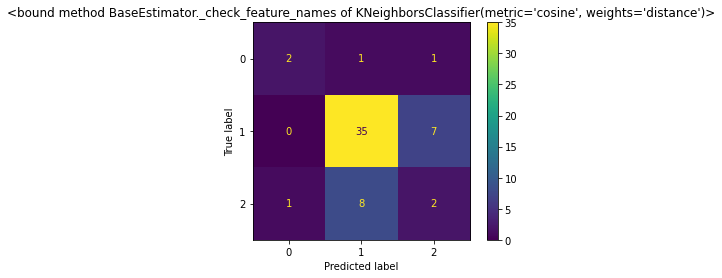

In [61]:
knn_cla = KNeighborsClassifier(n_neighbors = 5, weights = 'distance',metric = 'cosine')
knn_cla.fit(X_train, y_train)
cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_cla.predict(X_test)), display_labels=['0', '1', '2'])


cmd_obj.plot()
cmd_obj.ax_.set_title(knn_cla._check_feature_names)

For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(n_neighbors=8)>
Training set score: 0.6058628108003109
Testing set score: 0.8404124345952602
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=43, weights='distance')>
Training set score: 0.6428576839826841
Testing set score: 0.8944290550938749
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=8)>
Training set score: 0.6058628108003109
Testing set score: 0.8404124345952602
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(n_neighbors=51, weights='distance')>
Training set score: 0.6452622793872793
Testing set score: 0.8938134810710988


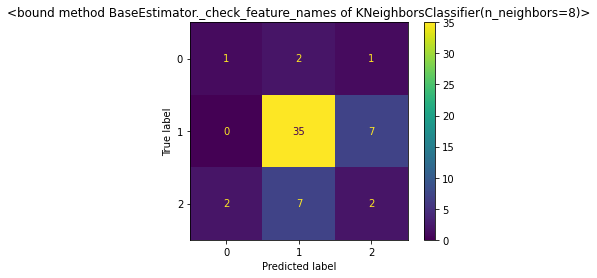

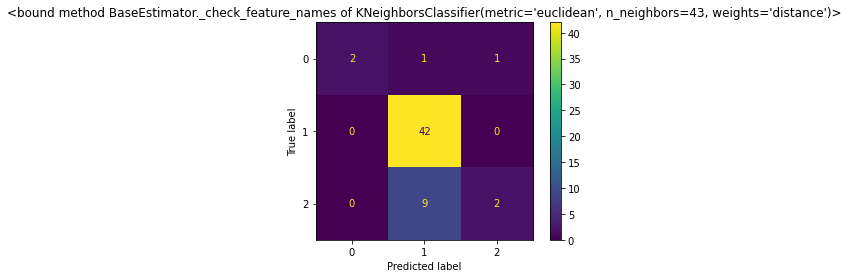

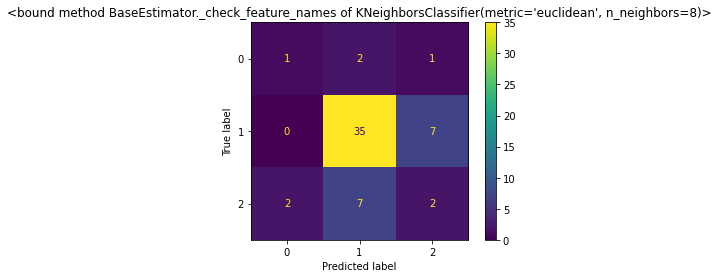

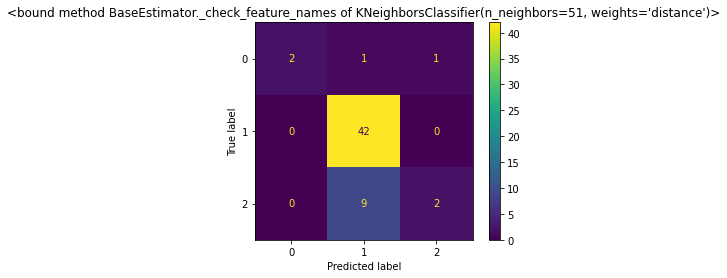

In [38]:
classifiers = {KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 8, weights = 'uniform',metric = 'minkowski'),
                KNeighborsClassifier(n_neighbors = 43, weights = 'distance',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 51, weights = 'distance',metric = 'minkowski'),
                }
cv = RepeatedStratifiedKFold(n_repeats = 10, n_splits=10, random_state=1)
for knn_classifier in classifiers:
    y_train_scores = cross_val_score(knn_classifier, X_train, y_train, scoring = 'roc_auc_ovr', cv=cv, n_jobs=-1)
    knn_classifier.fit(X_train, y_train)
    y_test_predict = knn_classifier.predict_proba(X_test)
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_classifier.predict(X_test)), display_labels=['0', '1', '2'])
    cmd_obj.plot()
    cmd_obj.ax_.set_title(knn_classifier._check_feature_names)
    print('For classifier: ', knn_classifier._check_feature_names)
    print('Training set score:', np.mean(y_train_scores))
    print('Testing set score:',roc_auc_score(y_test, y_test_predict, average = 'micro', multi_class = 'ovr'))

More fine-tuned testing with top 4 k values of metric = minkowski

For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='manhattan', n_neighbors=7)>
Training set score: 0.6018747363747364
Testing set score: 0.8411819021237303
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(n_neighbors=8, weights='distance')>
Training set score: 0.6136544289044289
Testing set score: 0.8545706371191135
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=8, weights='distance')>
Training set score: 0.6136544289044289
Testing set score: 0.8545706371191135
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='manhattan', n_neighbors=8, weights='distance')>
Training set score: 0.6197511308136308
Testing set score: 0.855647891658972


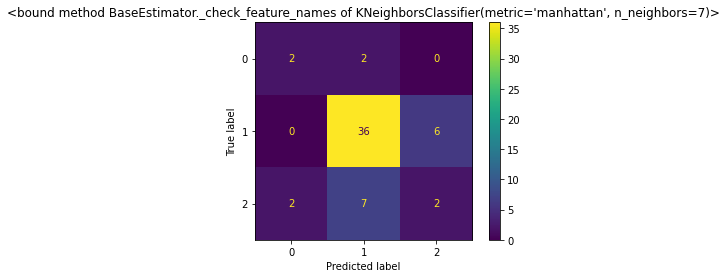

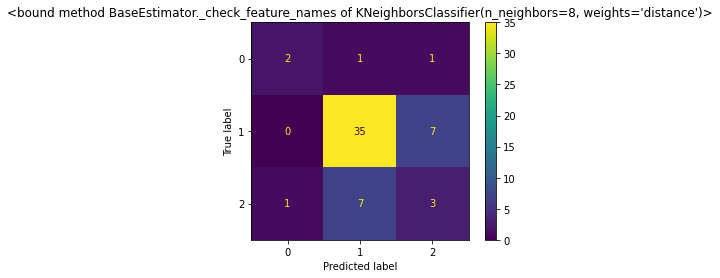

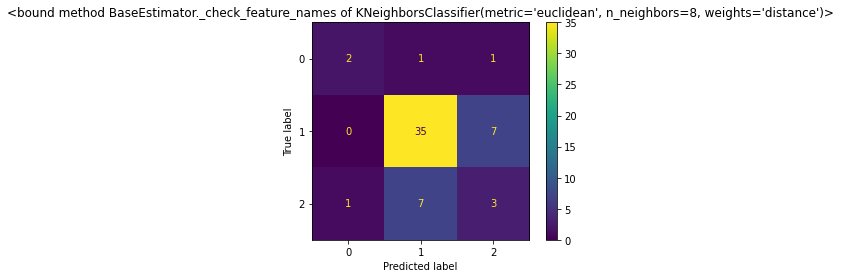

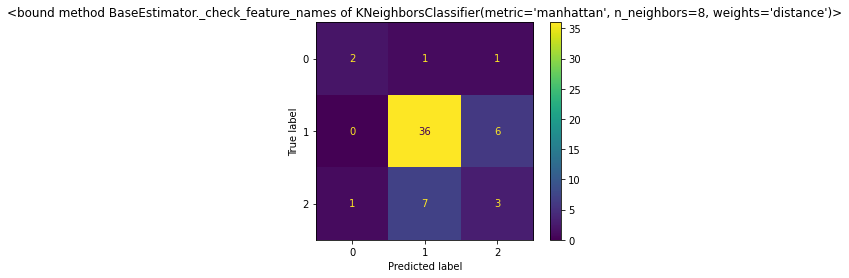

In [37]:
classifiers = {KNeighborsClassifier(n_neighbors = 7, weights = 'uniform',metric = 'manhattan'),
                KNeighborsClassifier(n_neighbors = 8, weights = 'distance',metric = 'manhattan'),
                KNeighborsClassifier(n_neighbors = 8, weights = 'distance',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 8, weights = 'distance',metric = 'minkowski'),
                }
cv = RepeatedStratifiedKFold(n_repeats = 10, n_splits=10, random_state=1)
for knn_classifier in classifiers:
    y_train_scores = cross_val_score(knn_classifier, X_train, y_train, scoring = 'roc_auc_ovr', cv=cv, n_jobs=-1)
    knn_classifier.fit(X_train, y_train)
    y_test_predict = knn_classifier.predict_proba(X_test)
    cmd_obj = ConfusionMatrixDisplay(confusion_matrix(y_test, knn_classifier.predict(X_test)), display_labels=['0', '1', '2'])
    cmd_obj.plot()
    cmd_obj.ax_.set_title(knn_classifier._check_feature_names)
    print('For classifier: ', knn_classifier._check_feature_names)
    print('Training set score:', np.mean(y_train_scores))
    print('Testing set score:',roc_auc_score(y_test, y_test_predict, average = 'micro', multi_class = 'ovr'))

In [12]:
classifiers = {KNeighborsClassifier(n_neighbors = 49, weights = 'distance',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 51, weights = 'distance',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 52, weights = 'distance',metric = 'euclidean'),
                KNeighborsClassifier(n_neighbors = 54, weights = 'distance',metric = 'euclidean'),
                }
cv = RepeatedStratifiedKFold(n_repeats = 10, n_splits=10, random_state=1)
for knn_classifier in classifiers:
    y_train_scores = cross_val_score(knn_classifier, X_train, y_train, cv=cv, n_jobs=-1)
    
    knn_classifier.fit(X_train, y_train)
    y_test_predict = knn_classifier.predict(X_test)
    y_test_score = metrics.accuracy_score(y_test, y_test_predict)
    print('For classifier: ', knn_classifier._check_feature_names)
    print('Training set score:', np.mean(y_train_scores))
    print('Testing set score:',y_test_score)

For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=54, weights='distance')>
Training set score: 0.6461029411764706
Testing set score: 0.7894736842105263
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=52, weights='distance')>
Training set score: 0.6466911764705883
Testing set score: 0.8070175438596491
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=51, weights='distance')>
Training set score: 0.6478676470588236
Testing set score: 0.8070175438596491
For classifier:  <bound method BaseEstimator._check_feature_names of KNeighborsClassifier(metric='euclidean', n_neighbors=49, weights='distance')>
Training set score: 0.6461029411764707
Testing set score: 0.8070175438596491


Thus, the parameters choosen would be: n_neighbors = 51, weights = 'distance',metric = 'minkowski'

# Accuracy evaluation

In [24]:
cv = RepeatedStratifiedKFold(n_repeats = 10, n_splits=10, random_state=1)
knn = KNeighborsClassifier(n_neighbors = 51, weights = 'distance',metric = 'minkowski')

In [26]:
y_train_scores = cross_val_score(knn, X_train, y_train, cv=cv, n_jobs=-1)
knn.fit(X_train, y_train)
y_test_predict = knn.predict(X_test)
y_test_score = metrics.accuracy_score(y_test, y_test_predict)
print('Training set score:', np.mean(y_train_scores))
print('Testing set score:',y_test_score)
f1 = f1_score(y_test, y_test_predict, average='weighted')
print("F1 Score: ", f1)

Training set score: 0.6478676470588236
Testing set score: 0.8070175438596491
F1 Score:  0.760376117598962


## Reference:
##### https://www.kaggle.com/code/arunimsamudra/k-nn-with-hyperparameter-tuning
##### https://medium.datadriveninvestor.com/k-nearest-neighbors-in-python-hyperparameters-tuning-716734bc557f
##### https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html
##### https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
##### https://towardsdatascience.com/its-a-mistake-to-trust-the-best-model-of-a-gridsearchcv-536a73e835ad